In [64]:
from PIL import Image, ImageFile #pip install Pillow==9.4.0
import sys
import os
import numpy as np
import logging
import glob

logging.basicConfig(level=logging.INFO)
Image.MAX_IMAGE_PIXELS=None
ImageFile.LOAD_TRUNCATED_IMAGES = True

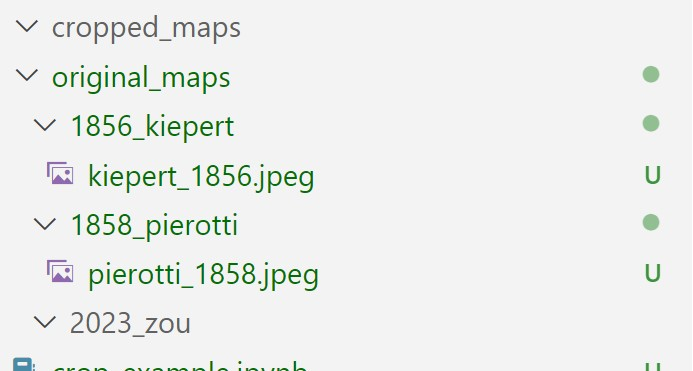

In [65]:
# Ensure original and cropped folders are named properly here!
map_data_topfolder = 'original_maps'
map_crop_topfolder = 'cropped_maps'

# For assistance, see how the data should be organized
from IPython.display import Image as ipyim
ipyim(filename="./directory_organization.jpg", width=400, height = 200)

In [62]:
def crop(img_path, output_dir):

    map_name = os.path.basename(img_path).split('.')[0] # get the map name without extension
    output_dir = os.path.join(output_dir, map_name)

    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)

    map_img = Image.open(img_path) 
    width, height = map_img.size 

    #print(width, height)

    shift_size = 1000

    # pad the image to the size divisible by shift-size
    num_tiles_w = int(np.ceil(1. * width / shift_size))
    num_tiles_h = int(np.ceil(1. * height / shift_size))
    enlarged_width = int(shift_size * num_tiles_w)
    enlarged_height = int(shift_size * num_tiles_h)

    enlarged_map = Image.new(mode="RGB", size=(enlarged_width, enlarged_height))
    # paste map_imge to enlarged_map
    enlarged_map.paste(map_img) 

    for idx in range(0, num_tiles_h):
        for jdx in range(0, num_tiles_w):
            img_clip = enlarged_map.crop((jdx * shift_size, idx * shift_size,(jdx + 1) * shift_size, (idx + 1) * shift_size, ))

            out_path = os.path.join(output_dir, 'h' + str(idx) + '_w' + str(jdx) + '.jpg')
            img_clip.save(out_path)

    logging.info('Done cropping %s' %img_path )

# Run crop on all maps
for map_data_subfolder in next(os.walk(map_data_topfolder))[1]:
    jpeg_list = glob.glob(map_data_topfolder + '/' + map_data_subfolder + '/*.jpeg')
    if len(jpeg_list) != 1:
        print(map_data_subfolder + " failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.")
    else:
        map_image = jpeg_list[0].split("\\")[1]
        crop(map_data_topfolder + '/' + map_data_subfolder + "/" + map_image, map_crop_topfolder)

# ex. hardcoded crop on one map
# crop('original_maps/1858_pierotti/pierotti_1858.jpeg', 'cropped_maps')


INFO:root:Done cropping original_maps/1856_kiepert/kiepert_1856.jpeg
INFO:root:Done cropping original_maps/1858_pierotti/pierotti_1858.jpeg


2023_zou failed. Please ensure there is exactly 1 file with extension .jpeg in the folder.
